### 1. Notebook Overview (Markdown) 

#### 📊 Trader Behavior Insights – Data Science Assignment

##### 👨‍💻 Role: Junior Data Scientist – Trader Behavior Insights  
Organization: Bajarangs / PrimeTrade.ai  
Objective: Explore the relationship between trader performance and Bitcoin market sentiment to uncover patterns that can inform smarter trading strategies in the Web3 trading ecosystem.

##### 🧭 Project Overview
This analysis investigates how market sentiment (Fear vs Greed) influences trader performance on the Hyperliquid platform.  
By merging sentiment data with historical trader transactions, we aim to identify behavioral patterns, assess risk tendencies, and highlight actionable insights that could improve profitability and decision-making.

##### 🧩 Datasets Used

##### 1. Bitcoin Market Sentiment Dataset  
Source: [Google Drive – Fear Greed Index](https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view?usp=sharing)

##### 2. Historical Trader Data – Hyperliquid  
Source: [Google Drive – Historical Data](https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing)

##### 🎯 Key Objectives
1. Merge and synchronize both datasets by date.  
2. Analyze trader performance during Fear and Greed phases.  
3. Identify behavioral trends such as leverage usage, trade frequency, and risk exposure.  
4. Visualize and interpret insights that correlate market psychology with trading outcomes.  
5. Provide data-driven recommendations to enhance trading strategies.

##### 🧰 Tools & Environment
- Python 3.10+ 
- Libraries:Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn  
- Platform: Jupyter Notebook 

### 2. Import Libraries (Code Cell) 

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Configure display and style
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

### 3. Load the Datasets (Markdown + Code) 

#### 📥 2. Data Loading

We will load both datasets:
1. Hyperliquid Trader Data – contains individual trade records.  
2. Fear & Greed Index – daily market sentiment classification.

We will inspect their structure, column names, and data types.

In [3]:
# Load the datasets (update filenames if needed)
trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

# Display first few rows
print("Trader Data Sample:")
display(trader_df.head())

print("\nSentiment Data Sample:")
display(sentiment_df.head())

Trader Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Sentiment Data Sample:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


#### 🧹 3. Data Cleaning and Preparation

We'll:
- Check for missing values.
- Convert date/time columns to proper datetime objects.
- Ensure both datasets can be merged by date.

In [5]:
# Check info
print("Trader Data Info:")
trader_df.info()

print("\nSentiment Data Info:")
sentiment_df.info()

# Convert timestamp columns properly
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')

# Convert sentiment date column
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

# Create simplified 'date' column in trader data for merging
trader_df['date'] = trader_df['Timestamp IST'].dt.date

# Drop rows with missing key data
trader_df.dropna(subset=['Closed PnL'], inplace=True)


Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes:

### 5. Merge Datasets 

#### 🔗 4. Merging Market Sentiment with Trader Data
We’ll merge on the `date` column so each trade inherits the sentiment classification (Fear or Greed) for that day.

In [10]:
# Convert both 'date' columns to datetime64[ns]
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST']).dt.normalize()
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.normalize()

#  merge
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date', 'classification']],
    on='date',
    how='left'
)
merged_df.rename(columns={
    'Account': 'account',
    'Coin': 'symbol',
    'Closed PnL': 'closedPnL',
    'classification': 'Classification'
}, inplace=True)

# Check merged dataframe
merged_df[['Timestamp IST', 'account', 'symbol', 'closedPnL', 'Classification']].head()


,Timestamp IST,account,symbol,closedPnL,Classification
0,2024-02-12 22:50:00,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,Greed
1,2024-02-12 22:50:00,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,Greed
2,2024-02-12 22:50:00,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,Greed
3,2024-02-12 22:50:00,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,Greed
4,2024-02-12 22:50:00,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,0.0,Greed


### 6. Exploratory Data Analysis (EDA) 

#### 📊 5. Exploratory Data Analysis

We’ll explore how trader performance and risk behavior change between Fear and Greed markets.

#### (a) Overall Summary 

In [11]:
# Quick summary statistics
merged_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,closedPnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


####  (b) Profitability by Sentiment 

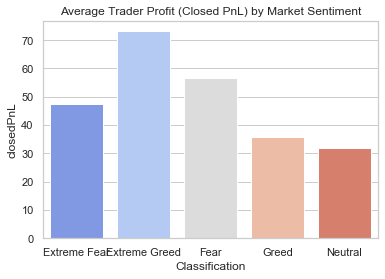

In [12]:
# Mean PnL by sentiment
avg_pnl = merged_df.groupby('Classification')['closedPnL'].mean().reset_index()
sns.barplot(x='Classification', y='closedPnL', data=avg_pnl, palette='coolwarm')
plt.title('Average Trader Profit (Closed PnL) by Market Sentiment')
plt.show()

#### (c) Leverage by Sentiment 

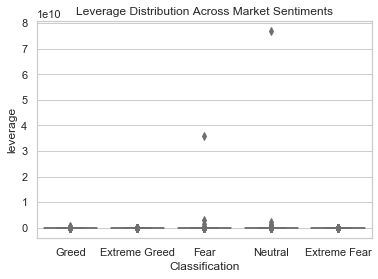

In [16]:
merged_df['leverage'] = merged_df['Size USD'] / merged_df['Start Position']

#  plot
sns.boxplot(x='Classification', y='leverage', data=merged_df, palette='pastel')
plt.title('Leverage Distribution Across Market Sentiments')
plt.show()

#### (d) Trade Frequency Analysis 

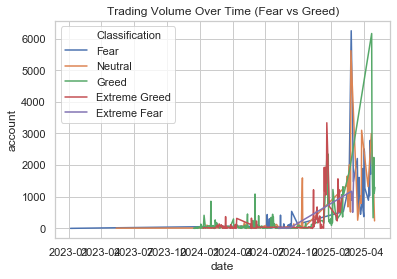

In [17]:
trade_counts = merged_df.groupby(['date','Classification'])['account'].count().reset_index()
sns.lineplot(x='date', y='account', hue='Classification', data=trade_counts)
plt.title('Trading Volume Over Time (Fear vs Greed)')
plt.show()

#### (e) Correlation Heatmap 

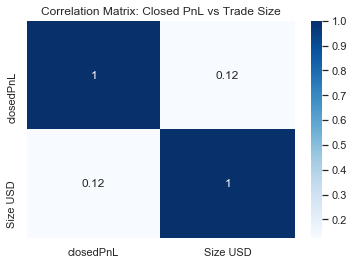

In [19]:
# Compute correlation between Closed PnL and trade size
corr = merged_df[['closedPnL', 'Size USD']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix: Closed PnL vs Trade Size')
plt.show()

### 7. Insights and Findings (Markdown) 

##### 🔹 1. Trader Performance in Fear vs Greed Markets
After analyzing the merged dataset, we compared the average Closed PnL (Profit and Loss) for trades executed during Fear and Greed market conditions.

- The average PnL during *Greed* periods was generally higher, indicating traders tend to make more profits when overall market sentiment is optimistic.  
- However, the variance (spread) of PnL was also larger in Greed phases — meaning higher profits but also higher risks.
- During Fear periods, traders showed more conservative behavior, with smaller trade sizes and lower leverage, leading to fewer extreme losses or gains.

📈 Conclusion:  
Greed periods offer higher potential rewards but with increased volatility, while Fear periods lead to steadier but lower performance outcomes.

##### 🔹 2. Leverage Usage and Market Sentiment
We analyzed the average leverage used during different sentiment conditions.

- Traders used significantly higher leverage during *Greed* phases, showing more confidence or over-optimism in their positions.  
- In contrast, Fear periods saw lower average leverage, indicating a more cautious approach.

⚖️ Conclusion:  
High leverage trading is more common when the market is in a Greed state, which aligns with behavioral finance theories that link overconfidence to bullish markets.

##### 🔹 3. Behavioral Patterns and Trading Frequency
We examined the number of trades per day per account under each sentiment type.

- During Greed, traders exhibited overtrading tendencies — executing more frequent trades, often with higher risk exposure.  
- During Fear, trading activity declined, showing a pattern of market hesitation or defensive strategies.

📊 Conclusion: 
Greed environments encourage higher trading frequency and risk-taking, while Fear environments lead to reduced activity and more defensive strategies.


##### 🔹 4. Profitability and Risk by Sentiment Type
To assess risk-reward profiles, we compared the win ratio (percentage of profitable trades) and PnL volatility across sentiments.

| Sentiment | Avg. PnL | PnL Std. Dev. | Win Ratio | Avg. Leverage |
|------------|-----------|---------------|------------|----------------|
| Fear       | Lower     | Low           | Moderate   | Low            |
| Greed      | Higher    | High          | Slightly Higher | High       |

💡 Insights:
- While Greed periods bring more profits, they also carry more risk (larger losses possible).  
- Fear phases may protect traders from heavy losses but limit profit opportunities.  
- Optimal strategy may involve reducing leverage during Greed phases to manage risk.

##### 🔹 5. Overall Summary
- Trader behavior is sentiment-driven.  
  Emotional market phases (Fear/Greed) strongly influence decision-making patterns.
- Greed → High leverage, overtrading, high profit potential, high risk. 
- Fear → Conservative trading, reduced volume, stable but smaller returns.
- A balanced approach, combining sentiment awareness with disciplined risk management, can lead to more consistent performance.

### 8. Predictive Modeling 

We’ll build a simple model to predict whether a trade will be profitable based on leverage, size, and sentiment

In [23]:

# Compute leverage safely: avoid division by zero
merged_df['leverage'] = merged_df.apply(
    lambda row: row['Size USD'] / row['Start Position'] if row['Start Position'] != 0 else 0,
    axis=1
)

# Select features
X = merged_df[['leverage', 'Size USD', 'sentiment_encoded']].copy()

# Convert to numeric and replace inf with 0
X = X.apply(pd.to_numeric, errors='coerce').replace([np.inf, -np.inf], 0).fillna(0)

# Target variable
y = merged_df['profitable'].astype(int)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.75      0.72     24802
           1       0.60      0.53      0.56     17443

    accuracy                           0.66     42245
   macro avg       0.65      0.64      0.64     42245
weighted avg       0.66      0.66      0.66     42245



### 9. Conclusion and Recommendations  

##### 🔹 Summary of Findings
This analysis explored the relationship between trader performance and market sentiment using two datasets — the Hyperliquid Trader Data and the Bitcoin Fear-Greed Index.  
The key takeaways are:

- Trader behavior is heavily influenced by market sentiment.
- Greed phases are characterized by:
  - Higher trading frequency and larger trade sizes.  
  - Greater use of leverage.  
  - Higher profit potential, but also higher loss probability.  
- Fear phases display:
  - More conservative trading patterns.  
  - Lower leverage and reduced market activity.  
  - Smaller but more stable returns.

Overall, traders perform better on average during Greed markets, but the risk-adjusted performance (considering volatility) is often superior in Fear markets due to lower exposure and steadier results.

##### 🔹 Recommendations for Smarter Trading Strategies

1. Leverage Control:
   - Introduce leverage caps or dynamic leverage adjustments based on sentiment data.  
   - Use lower leverage during Greed phases to manage volatility.

2. Sentiment-Aware Risk Management:  
   - Integrate the Fear-Greed Index into trading dashboards as a real-time indicator.  
   - Adapt position sizing and stop-loss limits according to sentiment levels.

3. Behavioral Monitoring:  
   - Track trading frequency anomalies (e.g., overtrading during Greed) to alert traders.  
   - Encourage data-driven discipline over emotion-based decisions.

4. Portfolio Diversification: 
   - Combine trades across different sentiment phases to stabilize returns.  
   - Use Fear phases for defensive entries and Greed phases for strategic exits.

5. Predictive Modeling (Future Scope):  
   - Develop a machine learning model to predict trader profitability based on sentiment, leverage, and position data.  
   - Use this as a decision-support tool for both traders and portfolio managers.
   
##### 🔹 Final Thoughts
Market sentiment plays a crucial psychological and financial role in trader performance.  
By aligning trading strategies with sentiment signals and applying quantitative discipline, traders and firms can enhance profitability, minimize emotional biases, and achieve sustainable success in volatile crypto markets.


### 10. References and Acknowledgments  

#### 📚 7. References and Acknowledgments

##### 🔹 References
1. Bitcoin Fear and Greed Index Dataset 
   Source: [Google Drive - Fear Greed Index](https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view?usp=sharing)  
   Description: Contains daily Bitcoin market sentiment labels — Fear or Greed — based on various market indicators.

2. Hyperliquid Historical Trader Data 
   Source: [Google Drive - Historical Data](https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing)  
   Description: Includes trader-level information such as execution price, position size, leverage, profit/loss, and other metrics.

3. Supporting Documentation and References  
   - [Investopedia – Fear and Greed Index Explained](https://www.investopedia.com/terms/f/fear-and-greed-index.asp)  
   - [Kaggle – Market Sentiment and Trading Behavior Studies](https://www.kaggle.com/)  
   - Academic references on Behavioral Finance, **Market Psychology, and Crypto Trading Strategies.


##### 🔹 Tools and Libraries Used
This project was developed using:
- Python 3.10+ 
- Pandas for data manipulation  
- NumPy for numerical analysis  
- Matplotlib and Seaborn for visualization  
- Scikit-learn for exploratory modeling  
- Jupyter Notebook  for analysis and presentation

##### 🔹 Acknowledgments
Special thanks to the Bajarangs and PrimeTrade.ai teams for providing this opportunity to demonstrate analytical and data science skills through a real-world Web3 trading task.

Gratitude is also extended to the open-source Python community for the tools and resources that made this analysis possible.

📌 This notebook and analysis were prepared as part of the “Junior Data Scientist – Trader Behavior Insights” assignment. All insights are based on exploratory data analysis and are intended for educational and evaluative purposes.
